# Présentation des résultats
Réaliser des calculs vectoriels ou matriciels comme nous avons appris dans les chapitres précédents c'est bien, mais c'est encore mieux de pouvour visualiser graphiquement les résultats obtenus. Nous verrons dans ce chapitre les différentes possibilités proposées par Matlab pour présenter des résultats sous la forme d'une courbe 2D ou 3D, un nuage de points, un graphique de surface, des courbes de niveau ou même une animation. Nous vous présenterons aussi les fonctions qui permettent de sauvegarder les images ou vidéos obtenues. Nous essayerons d'être clairs et précis mais pour toute question ou remarque sur les lignes qui suivent, n'hésitez pas à envoyer un mail à leur auteur Carlos Sosa Marrero (carlos.sosa@univ-rennes1.fr).  

## Les courbes 2D
Commençons par la forme la plus simple de représentation. La fonction `plot(x, y)` crée une courbe 2D à partir des données dans `y` et les valeurs correspondantes dans `x`. Regardons l'exemple suivant.

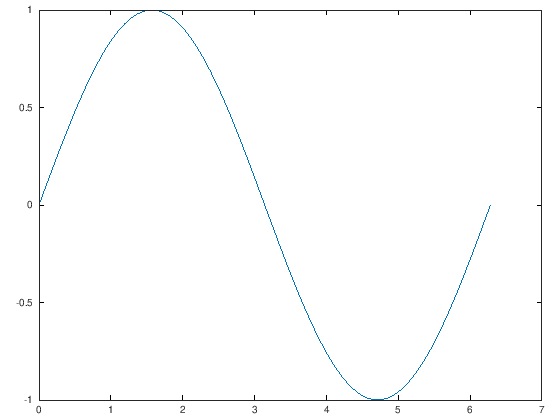

In [2]:
x = linspace(0, 2*pi, 101);
y = sin(x);
figure(1) # nous verrons dans la suite l'utilité de cette ligne
plot(x, y)

Et voilà comment nous pouvons visualiser en une seule ligne de commande notre fonction sinus. Vous nous accorderez pourtant que le graphique est un peu vide. Nous aimerions bien lui donner un titre, indiquer les nom des axes ou ajouter une grille. Et bien, pas de souci. Matlab permet de faire tout cela de façon simple et intuitive. Voyons les commandes qu'il faut utiliser. 

## Le titre d'un graphique 
Nous pouvons donner un titre à notre graphique en utilisant la fonction `title('text')`, comme vous verrez dans l'exemple suivant.

## Les propriétés des axes
Comme nous illustrerons avec l'exemple suivant, nous pouvons indiquer les noms des axes x et y à l'aide des fonctions `xlabel('text')` et `ylabel('text')`, respectivement. Il est également possible de modifier leurs valeurs limites, à l'aide de la fonction `axis([xmin xmax ymin ymax])`, ainsi que leurs subdivisions. Pour cette dernière tâche, nous devons utiliser la fonction `set`, qui permet de modifier les propriétés d'un graphique. Nous lui indiquons la figure que nous voulons éditer, dans la plupart des cas, le graphique courant, renvoyé par la commande `gca` (*Get current axis*); le nom de la propriété que nous souhaitons modifier ('XTick', 'YTick' ou 'XTickLabel') et la nouvelle valeur de la propriété en question. Vous remarquerez dans l'exemple suivant que Matlab possède un interprète qui permet d'indiquer les titres ou les noms des axes en $\LaTeX{}$. À partir de la version R2016b de Matlab, vous pouvez réaliser ces modifications de manière plus simple à l'aide des fonctions `xticks(ticks)`, `yticks(ticks)`, `xticklabels(labels)` et `yticklabels(labels)`.

## Comment ajouter une grille
La commande `grid on` permet d'afficher une grille à l'arrière plan du graphique, comme nous vous montrons dans l'exemple suivant. 

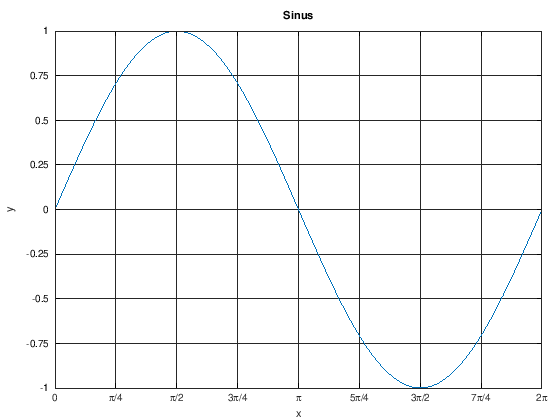

In [3]:
x = linspace(0, 2*pi, 101);
y = sin(x);
figure(1) # nous verrons dans la suite l'utilité de cette ligne
plot(x, y)
title('Sinus')
axis([0, 2*pi, -1, 1])
set(gca, 'XTick', 0:0.25*pi:2*pi)
set(gca, 'YTick', -1:0.25:1)
xTicksLabel = {'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'};
set(gca, 'XTickLabel', xTicksLabel)
xlabel('x')
ylabel('y')
grid on

## La création de fenêtres de figure
Si vous avez lu attentivement les blocs de code des deux exemples précédents, vous avez sûrement remarqué l'existence d'une fonction (`figure(1)`) dont nous n'avons pas encore expliqué l'utilité. Ne vous inquiétez pas, le mystère sera dévoilé dans les lignes suivantes. En effet, à chaque fois que nous demandons à Matlab de créer un graphique (pour l'instant vous ne connaissez que la fonction `plot(x, y)` pour ce faire) il a besoin d'une "fenêtre de figure" pour l'afficher. La fonction `figure(H)` sert justement à construire une telle fenêtre `H`. Automatiquement, Matlab crée une première fenêtre appelée `Figure 1`. Vous vous dites alors qu'il n'y aurait pas besoin de la définir nous mêmes pour les exemples précédents. C'est tout à fait vrai. Vous pouvez vous amuser à mettre les lignes en question en commentaire et constater que vous continuez à obtenir les graphiques correspondants sans problème. Cependant, regardons l'exemple suivant.

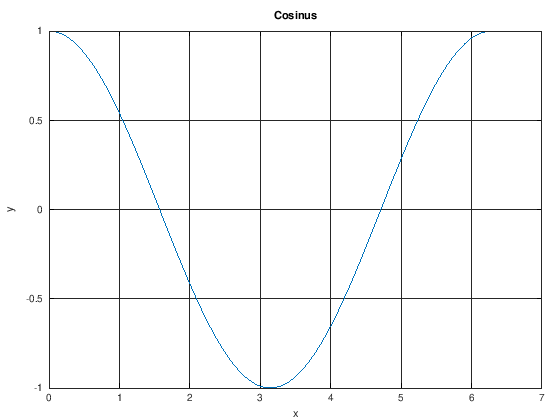

In [4]:
x = linspace(0, 2*pi, 101);

sinx = sin(x);
plot(x, sinx)
title('Sinus')
xlabel('x')
ylabel('y')
grid on

cosx = cos(x);
plot(x, cosx)
title('Cosinus')
xlabel('x')
ylabel('y')
grid on

Nous créons deux graphiques des fonctions trigonométriques, auxquels nous donnons même les titres correspondants, mais nous ne voyons à l'écran que celui correspondant à *cos(x)*. À quoi est-il dû ce fait ? Et bien, en fait, Matlab ne crée automatiquement qu'une seule fenêtre de figure dans laquelle il affiche tout nouveau graphique en remplaçant le précédent. En conséquence, nous avons beau créer mille et un graphiques, nous n'allons pouvoir visualiser à l'écran que le dernier. Heureusement, la fonction `figure(H)` est là pour nous aider. Nous pouvons grâce à elle définir une nouvelle fenêtre de figure `H` pour chaque graphique. La commande `close all`, que nous vous conseillons d'inclure au début de vos scripts, ferme toutes les fenêtres de figure existantes. Regardons l'exemple suivant. 

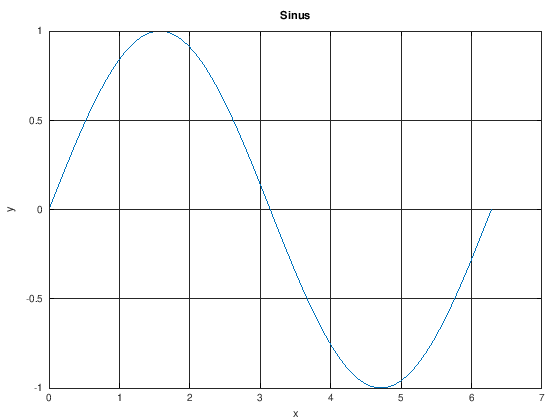

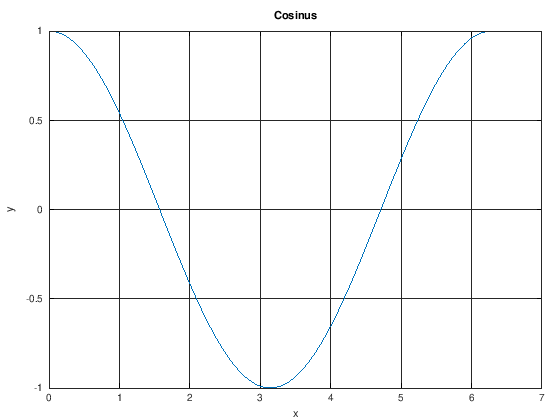

In [5]:
close all

x = linspace(0, 2*pi, 101);

sinx = sin(x);
figure(1) # cette ligne reste encore facultative
plot(x, sinx)
title('Sinus')
xlabel('x')
ylabel('y')
grid on

cosx = cos(x);
figure(2)
plot(x, cosx)
title('Cosinus')
xlabel('x')
ylabel('y')
grid on

Nous pourrions nous contenter d'indiquer le numéro de chaque fenêtre de figure de forme explicite. Cependant, si jamais nous voulions ajouter une figure au milieu du code, nous serions obligés de modifier manuellement tous les appels à `figure` successifs. Pour éviter cette tâche qui, vous nous accorderez, semble un peu répétitive, nous vous conseillons de définir une variable `nfig`, de l'initialiser à zéro et de l'incrémenter d'une unité avant chaque graphique, comme nous vous montrons dans l'exemple suivant.

In [6]:
#close all 

#nfig = 0;

#nfig = nfig + 1;
#figure(nfig)
#un graphique

#nfig = nfig + 1;
#figure(nfig)
#un autre graphique

#nfig = nfig + 1;
#figure(nfig)
#encore un autre graphique

#nfig = nfig + 1;
#figure(nfig)
#...



## Comment sauvegarder des figures
Si vous suivez notre conseil d'inclure la commande `close all` au début des vos scripts, vous constaterez que toutes les fenêtres de figures existantes au préalable disparaissent lorsque vous appuyez sur la touche `F5` de votre clavier. Vous nous accorderez que, parfois, il est un peu dommage d'envoyer de si belles images au cimetière des figures oubliées. Heureusement, Matlab a prévu une commande pour éviter cette situation douloureuse. Il s'agit de `saveas(fig, filename)`. Elle permet d'enregistrer la figure numéro `fig` sous le nom `filename`. Nous nous permettons de vous rappeler que l'extension (.png, .jpg, .tif, etc.) fait partie du `filename`. 

## Comment tracer plusieurs courbes sur un même graphique
Vous êtes capables, arrivés à ce point, d'afficher autant de courbes 2D que vous en voulez dans des fenêtres différentes. Cependant, dans certains cas, nous avons besoin de tracer plusieurs courbes dans un même graphique afin de les comparer. Pour ce faire, nous utilisons les commandes `hold on` et `hold off` comme nous vous montrons dans l'exemple suivant. Nous remarquons que Matlab trace automatiquement chaque courbe en une couleur différente mais, a priori, nous ne pouvons pas discerner quelle couleur correspond à quelle courbe. Nous avons alors besoin d'ajouter une légende à notre graphique. Ceci se fait à l'aide de la fonction `legend(label1, ..., labelN)`. Pour savoir comment forcer Matlab à tracer une courbe en une couleur précise, ainsi qu'indiquer son épaisseur, son style (pointillée, continue, etc) ou le symbole utilisé pour marquer ses points, nous vous invitons à consulter la documentation de la fonction `plot`.

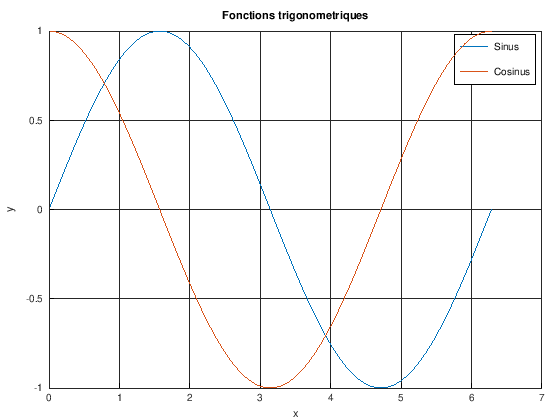

In [7]:
close all
nfig = 0;

x = linspace(0, 2*pi, 101);
sinx = sin(x);
cosx = cos(x);

nfig = nfig + 1;
figure(nfig)
hold on 
plot(x, sinx)
plot(x, cosx)
hold off
title('Fonctions trigonometriques')
xlabel('x')
ylabel('y')
legend('Sinus', 'Cosinus')
grid on

## Les subplots

Dans certains cas, il peut être pratique d'afficher plusieurs courbes dans la même fenêtre mais dans des graphiques différents. Matlab a prévu la fonction `subplot(m, n, p)` à cet effet. Elle divise une fenêtre de figure en une grille de taille `m` x `n` et crée de nouveaux axes dans la position `p`. Si la fenêtre a déjà une grille, elle se contente de créer les axes pour pouvoir tracer la courbe en question après (en appelant `plot`, ou n'importe quelle autre fonction de représentation graphique). Nous vous montrons un exemple d'utilisation de `subplot` pour des sinus de différentes fréquences angulaires.

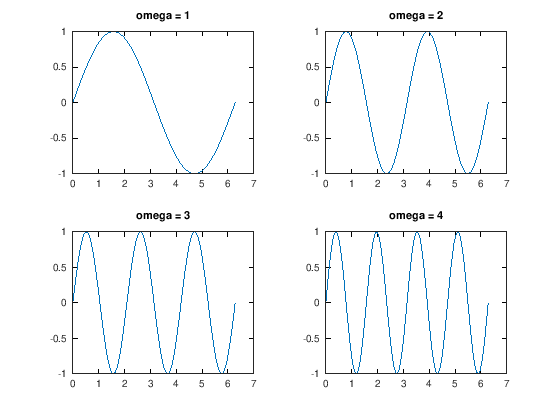

In [8]:
close all
nfig = 0;

x = linspace(0, 2*pi, 101);
omega = [1, 2, 3, 4, 5, 6];

nfig = nfig + 1;
figure(nfig)
for i = 1:4
    subplot(2, 2, i)
    plot(x, sin(omega(i) * x));
    title(['omega = ', num2str(omega(i))])
end

## Les nuages de points
Matlab permet de créer des nuages de points donnés par `x` et `y` à l'aide de la fonction `scatter(x, y)`. Regardons l'exemple suivant.

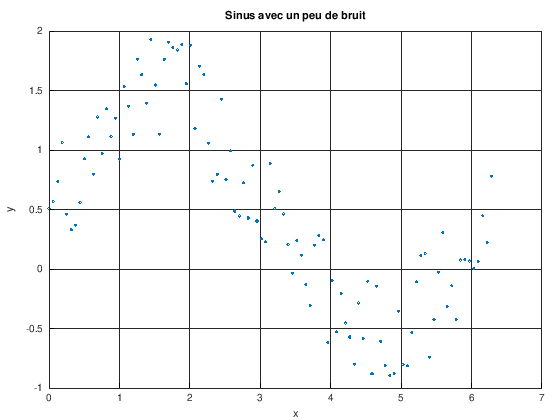

In [9]:
close all

nfig = 0;

x = linspace(0, 2*pi, 101);
y = sin(x) + rand(1, 101);

nfig = nfig + 1;
figure(nfig)
scatter(x, y)
title('Sinus avec un peu de bruit')
xlabel('x')
ylabel('y')
grid on

Pour découvrir comment changer la couleur, la taille ou la forme des points, nous vous invitons à regarder la documentation de la fonction. 

## Les courbes 3D
Les possibilités de représentation offertes par Matlab ne se limitent pas au plan xy. Nous pouvons également créer des graphiques en trois dimensions. Commençons par leur forme la plus simple, les courbes 3D.  Pour les tracer, nous devons utiliser la fonction `plot3(x, y, z)`, comme nous montrons dans l'exemple suivant. 

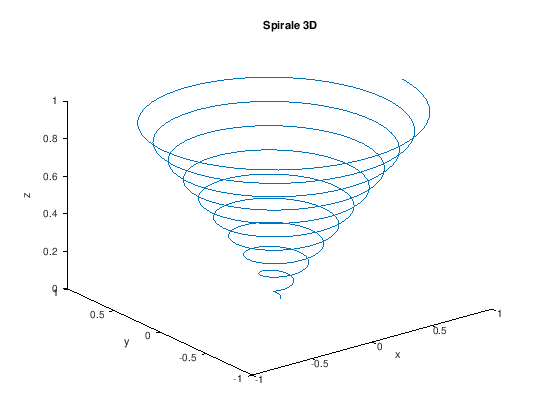

In [10]:
close all
nfig = 0;

theta = 0:0.1:20*pi;
r = linspace (0, 1, length(theta));
z = linspace (0, 1, length(theta));
x = r.*cos(theta);
y = r.*sin(theta);

nfig = nfig + 1;
figure(nfig)
plot3 (x, y, z);
title('Spirale 3D')
xlabel('x')
ylabel('y')
zlabel('z')

## Les courbes de niveau
Nous pouvons tracer des courbes de niveau à l'aide de la fonction `contour(X, Y, Z)`. Elle reçoit en argument `X` et `Y`, deux matrices contenant, respectivement, les coordonnées x et y des points de la surface en question, et `Z`, une troisième matrice avec les valeurs en z de ces points. Pour construire `X` et `Y` de façon simple, nous vous conseillons de faire appel à la fonction `meshgrid(xgv, ygv)`, où `xgv`et `ygv` sont des vecteurs contenant les coordonnées en x et y, respectivement.

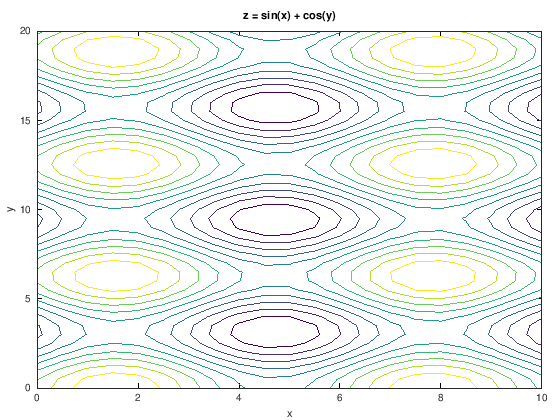

In [11]:
close all
nfig = 0;

[X, Y] = meshgrid(0:0.5:10, 0:0.5:20);
Z = sin(X) + cos(Y);

nfig = nfig + 1;
figure(nfig)
contour(X, Y, Z)
title('z = sin(x) + cos(y)')
xlabel('x')
ylabel('y')

### Les graphiques de surface
Matlab permet également la création de graphiques de surface. La fonction `surf(x, y, z)` a été développée à cet effet. Elle reçoit en argument les mêmes matrices que `contour(X, Y, Z)`. Regardons l'exemple suivant.

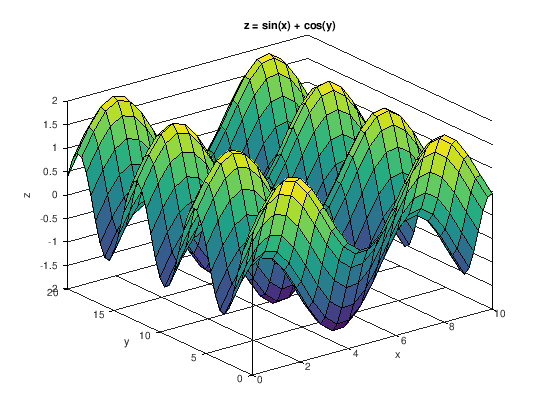

In [12]:
close all
nfig = 0;

[X, Y] = meshgrid(0:0.5:10, 0:0.5:20);
Z = sin(X) + cos(Y);

nfig = nfig + 1;
figure(nfig)
surf(X, Y, Z)
title('z = sin(x) + cos(y)')
xlabel('x')
ylabel('y')
zlabel('z')

## Les animations
Pour conclure ce chapitre, voyons comment réaliser des animations de nos résultats. Une première façon consiste à utiliser la fonction `pause(n)`, qui permet d'arrêter l'exécution pendant `n` secondes. En alternant des appels à une fonction de représentation graphique et à `pause` avec une valeur de `n` raisonnable, nous arrivons à créer une animation, comme nous montrons dans l'exemple qui suit. Il est possible que vous ne voyez pas l'animation sur ce Jupyter Notebook mais si vous copiez-collez le bloc de code suivant dans votre fenêtre de commande ou script Matlab, vous devriez pouvoir la contempler sans problème. 


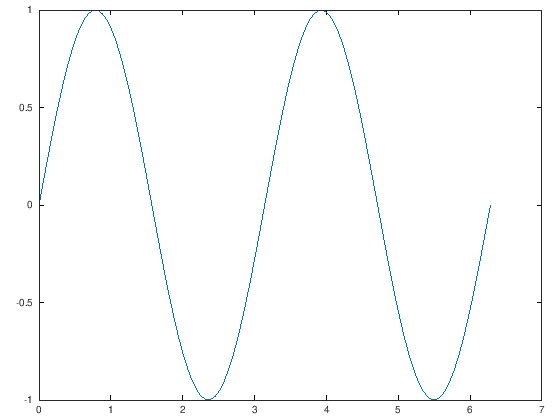

In [13]:
close all
nfig = 0;

x = linspace(0, 2*pi, 101);
omega = [linspace(1, 2, 11), linspace(2, 1, 11)];

nfig = nfig + 1;
figure(nfig)
t = 0;
while(t < 100)
    plot(x, sin(omega(mod(t, 22) + 1) * x));
    pause(0.2)
    t = t + 1;
end

Nous pouvons également créer des animations à l'aide des fonctions `movie(M)` ou `animatedline`. Pour trouver des exemples d'utilisation, nous vous invitions à consulter la documentation correspondante. 